In [1]:
from routenet import RouteNet
import os
from torch.utils.data import Dataset
import numpy as np
import torch
import matplotlib.pyplot as plt
from utils import MSELoss

/home/kix6/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = RouteNet(3, 1)
pretrained_path = 'work_dir/routenet/model_iters_20000.pth'
model.init_weights(pretrained_path)

In [3]:
contest_benchmark_dir = '/home/kix6/eda-proj/contest_benchmark/training_set/congestion'
circuitnet_benchmark_dir = '/home/kix6/eda-proj/congestion_training_set/congestion'

In [4]:
contest_benchmarks = os.listdir(os.path.join(contest_benchmark_dir, 'feature'))
circuitnet_benchmarks = []
ann_file = '/home/kix6/eda-proj/CircuitNet/files/test.csv'
with open(ann_file, 'r') as f:
    for line in f:
        feature, label = line.split(',')
        circuitnet_benchmarks.append(feature.split('/')[-1])

In [5]:
class DataLoader(Dataset):
    def __init__(self, features, labels):
        super().__init__()
        self.features = features
        self.labels = labels
        
    def __len__(self):
        return len(self.label)
    
    def __getitem__(self, idx):
        feature = np.load(self.features[idx]).transpose(2, 0, 1).astype(np.float32)
        label = np.load(self.labels[idx]).transpose(2, 0, 1).astype(np.float32)
        return torch.from_numpy(feature), torch.from_numpy(label)
    
features = [os.path.join(contest_benchmark_dir, 'feature', files) for files in contest_benchmarks]
labels = [os.path.join(contest_benchmark_dir, 'label', files) for files in contest_benchmarks]
contest_dataloader = DataLoader(features, labels)

circuitnet_f = [os.path.join(circuitnet_benchmark_dir, 'feature', files) for files in circuitnet_benchmarks]
circuitnet_l = [os.path.join(circuitnet_benchmark_dir, 'label', files) for files in circuitnet_benchmarks]
circuitnet_dataloader = DataLoader(circuitnet_f, circuitnet_l)

loss is 0.230989


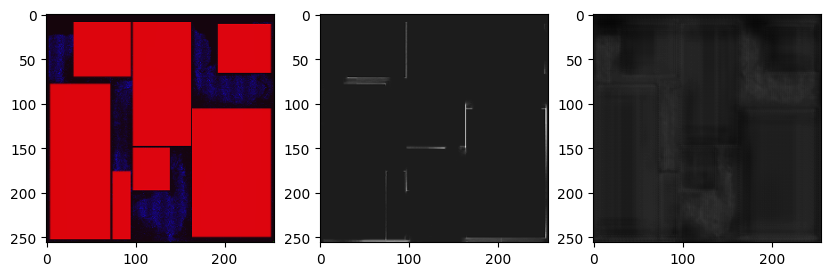

In [62]:
af, l = contest_dataloader[8]
img = l.squeeze(0).numpy()
fig, ax = plt.subplots(1, 3, figsize=(10, 5))
f = af.numpy()
f = np.asarray([(f[0,]-f[0,].min())/(f[0,].max()-f[0,].min()), (f[1,]-f[1,].min())/(f[1,].max()-f[1,].min()), (f[2,]-f[2,].min())/(f[2,].max()-f[2,].min())])
f = f.transpose(1, 2, 0)
ax[0].imshow(f)
ax[1].imshow(img, cmap='gray', vmin=0, vmax=1)
loss = MSELoss()
with torch.no_grad():
    pred = model(af[None, :]).squeeze(0)
    pred_img = pred.squeeze().numpy()
    ax[2].imshow(pred_img, cmap='gray', vmin=0, vmax=1)
    print('loss is %.6f' % (loss(pred, l)))